# Project 3
Quantum Tunneling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def potential(x,d,V0,x0):
    v = np.zeros_like(x)
    for i in range(x.size):
        if x[i] >= x0 and x[i] <=x0+d:
            v[i] = V0
    return v

def psiInitial(x, x0, sigma, k=350):
    return (((1/(np.pi * sigma**2))**.25) * (np.exp((-1/2) * ((x - x0) ** 2 / sigma ** 2))) * (np.exp(1j * k * (x - x0))))

#     return( ( (1 / (np.pi * sigma**2)) ** (1/4)) *
#            ( np.exp((-1/2) *((x - x0) ** 2 / sigma ** 2))) *
#            ( np.exp(1j * k * (x - x0))))

In [4]:
# Initital Conditions
x0 = 0.3
sigma = 0.05
k = 350

#had to adjust my dx because i was running into a memory error when creating the C matrix
dx = 1e-3
dt = 1e-7
x = np.arange(0,1.5,dx)
t = np.arange(0, 2e-3, dt)
x1 = 0.6
d = 5e-3
E = k**2 / 2 
V0 = np.arange(0,2*E+1,.2*E)

# Getting the potential energy
V=[]
for i in V0:
    V.append(potential(x, d, i, x1))

/Users/tjwilli/software/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


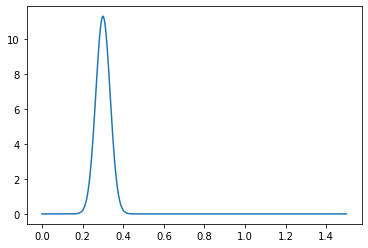

In [5]:
# Normalize
psi0 = psiInitial(x,x0,sigma)
plt.plot(x, np.conj(psi0)*psi0)

In [6]:
# Checking Normalization
integral = np.trapz(np.conj(psi0)*psi0,x)
print('The integral is', integral)

The integral is (1.0000000000000002+0j)


In [7]:
# Creates the C matrix
def C_matrix(v,dx,dt):
    Hdiag = np.diag(-1j * (1/dx**2 + v), 0)
    offdiag_elems = np.ones_like(x)[:-1] * 1j / 2 / dx**2
    Hdiaglow = np.diag(offdiag_elems, k=-1)
    Hdiaghi = np.diag(offdiag_elems, k =1)
    Hoffdiag = Hdiaglow + Hdiaghi
    H = Hdiag + Hoffdiag
    
    iden = np.identity(x.size)
    A = iden - dt / 2 * H
    B = iden + dt / 2 * H
    
    Ainv = np.linalg.inv(A)
    C = np.matmul(Ainv, B)
    return C

In [8]:
# Psi equation multiple times
allPsiT = []
for i in V:
    C = C_matrix(i,dx,dt)
    psi_t = []
    psi_t.append(psi0)
    for time in t:
        psi_t.append(np.dot(C, psi_t[-1]))
    allPsiT.append(psi_t[-1])

v0:  0.0  	reflected:  2.1193762564315338e-18  	transmitted:  0.9999999999947913 	total : 0.9999999999947913
v0:  12250.0  	reflected:  0.012430952057997062  	transmitted:  0.9875690478699943 	total : 0.9999999999279914
v0:  24500.0  	reflected:  0.06806275869619795  	transmitted:  0.9319372409356145 	total : 0.9999999996318124
v0:  36750.0  	reflected:  0.18707443228210802  	transmitted:  0.8129255666907028 	total : 0.9999999989728108
v0:  49000.0  	reflected:  0.3578848858748894  	transmitted:  0.6421151120237134 	total : 0.9999999978986028
v0:  61250.0  	reflected:  0.5373932138621607  	transmitted:  0.4626067826289587 	total : 0.9999999964911194
v0:  73500.0  	reflected:  0.6869993561298026  	transmitted:  0.31300063880123363 	total : 0.9999999949310362
v0:  85750.0  	reflected:  0.7945047639791306  	transmitted:  0.20549522942480222 	total : 0.9999999934039329
v0:  98000.0  	reflected:  0.8658892902060324  	transmitted:  0.13411070182470225 	total : 0.9999999920307348
v0:  110250.

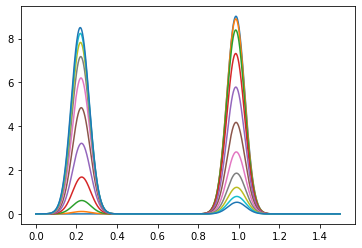

In [9]:
prob = []
index = -1
for lcv in allPsiT:
    index+=1
    prob = np.real(np.conj(lcv)*lcv)
    left =[]
    xLeft =[]
    right =[]
    xRight = []
    for i in range(prob.size):
        if x[i] < x1:
            left.append(prob[i])
            xLeft.append(x[i])
        else:
            right.append(prob[i])
            xRight.append(x[i])
    reflected = np.trapz(left,xLeft)
    transmitted = np.trapz(right,xRight)
    print("v0: ", V0[index]," \treflected: ",reflected, " \ttransmitted: ",transmitted, "\ttotal :",reflected+transmitted)
    plt.plot(x,prob)

find the integral of each these waves independently